In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import math
import numpy.random as nrand

In [3]:
#iport stock prices
stocks = pd.read_csv('../data/stock_values_2018.csv', parse_dates =["Date"], index_col="Date")
stocks

,AT0000606306,AT0000652011,AT0000720008,AT0000730007,AT0000743059,AT0000746409,AT0000831706,AT0000908504,AT0000937503,AT0000A21KS2,...,SE0000695876,SE0000825820,SE0001662230,SE0005190238,SE0007100581,SE0007100599,SE0011090018,SE0011166610,SE0012455673,SE0013256682
Date,,,,,,,,,,,,,,,,,,,,,
2007-12-31,112.167370,59.383175,19.258022,20.625,40.785840,37.10,42.549564,56.038006,44.40,88.900185,...,81.500,52.186146,68.086105,54.765877,50.666615,70.833270,151.25,71.263020,143.688080,83.767850
2008-01-31,80.967740,36.013920,17.278828,16.505,47.667890,44.10,27.696133,51.488980,40.98,48.303703,...,84.625,44.375973,54.428574,68.723200,36.666630,59.166610,105.50,63.464573,55.195290,86.347980
2008-02-29,81.781730,38.302097,13.780717,18.675,47.568584,49.05,29.006388,55.378147,41.80,54.789978,...,83.875,57.688766,57.171097,58.089046,37.249960,57.833280,106.75,68.400700,68.451800,82.219790
2008-03-31,82.691475,40.838990,12.050072,17.385,41.570374,45.09,30.443153,48.519615,44.00,52.348087,...,90.250,57.333755,60.335550,59.684170,35.916630,57.666610,102.75,71.573930,60.979946,77.575570
2008-04-30,99.689440,47.454807,14.590806,19.110,48.114777,49.74,33.452230,48.080000,49.25,54.103200,...,98.500,59.463802,52.107975,70.982960,31.166634,55.499947,96.00,68.048120,62.908165,88.412070
2008-05-30,92.267790,48.817764,14.112116,21.745,52.553850,54.30,30.804605,48.880000,53.57,57.766045,...,105.125,65.853940,52.107975,68.191490,34.666630,55.666615,102.25,74.923450,65.318440,89.960140
2008-06-30,77.730940,39.336754,12.685255,20.025,49.515022,56.92,24.099700,41.940000,52.15,49.982506,...,93.750,63.191387,44.513290,62.741486,29.083303,47.833286,88.50,62.583120,47.337790,77.919586
2008-07-31,76.802040,41.037964,12.188155,19.250,44.092800,51.12,15.632727,42.850000,42.35,44.411938,...,95.000,56.801247,42.614620,56.626850,27.749971,51.499950,89.50,66.637800,34.611540,62.954900
2008-08-29,71.812780,40.769350,13.541372,21.030,43.457226,51.56,16.265265,42.600000,37.06,47.311684,...,88.500,50.056095,44.091362,52.904900,30.833302,51.833282,103.25,63.817150,39.239273,66.051030


In [4]:
#calculate stock returns
returns = stocks.pct_change().dropna()
returns.head()

,AT0000606306,AT0000652011,AT0000720008,AT0000730007,AT0000743059,AT0000746409,AT0000831706,AT0000908504,AT0000937503,AT0000A21KS2,...,SE0000695876,SE0000825820,SE0001662230,SE0005190238,SE0007100581,SE0007100599,SE0011090018,SE0011166610,SE0012455673,SE0013256682
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-31,-0.278152,-0.393533,-0.102772,-0.199758,0.168736,0.188679,-0.349085,-0.081178,-0.077027,-0.456652,...,0.038344,-0.149660,-0.200592,0.254854,-0.276316,-0.164706,-0.302479,-0.109432,-0.615867,0.030801
2008-02-29,0.010053,0.063536,-0.202451,0.131475,-0.002083,0.112245,0.047308,0.075534,0.020010,0.134281,...,-0.008863,0.300000,0.050388,-0.154739,0.015909,-0.022535,0.011848,0.077778,0.240175,-0.047809
2008-03-31,0.011124,0.066234,-0.125585,-0.069076,-0.126096,-0.080734,0.049533,-0.123849,0.052632,-0.044568,...,0.076006,-0.006154,0.055351,0.027460,-0.035794,-0.002882,-0.037471,0.046392,-0.109155,-0.056485
2008-04-30,0.205559,0.161998,0.210848,0.099223,0.157429,0.103127,0.098842,-0.009061,0.119318,0.033528,...,0.091413,0.037152,-0.136364,0.189310,-0.132251,-0.037572,-0.065693,-0.049261,0.031621,0.139690
2008-05-30,-0.074448,0.028721,-0.032808,0.137886,0.092260,0.091677,-0.079146,0.016639,0.087716,0.067701,...,0.067259,0.107463,0.000000,-0.039326,0.112299,0.003003,0.065104,0.101036,0.038314,0.017510


In [5]:
#variance
var = returns.var()
var

AT0000606306    0.034631
AT0000652011    0.032302
AT0000720008    0.017388
AT0000730007    0.023291
AT0000743059    0.021635
                  ...   
SE0007100599    0.004331
SE0011090018    0.013644
SE0011166610    0.013617
SE0012455673    0.058571
SE0013256682    0.016958
Length: 486, dtype: float64

In [6]:
#standard deviation
std = returns.std()
std

AT0000606306    0.186095
AT0000652011    0.179727
AT0000720008    0.131862
AT0000730007    0.152613
AT0000743059    0.147090
                  ...   
SE0007100599    0.065812
SE0011090018    0.116810
SE0011166610    0.116691
SE0012455673    0.242014
SE0013256682    0.130223
Length: 486, dtype: float64

In [7]:
#covariance matrix
cov_matrix = returns.cov()

In [8]:
# correlation matrix
corr_matrix = returns.corr()

In [9]:
# returns.corr().plot(kind='bar')

In [10]:
#expected returns
e_r = stocks.resample('Y').last().pct_change().mean()
e_r

# (e_r*w).sum()
# np.dot(w,e_r)

AT0000606306   -0.835226
AT0000652011   -0.728598
AT0000720008   -0.507648
AT0000730007   -0.559758
AT0000743059   -0.544193
                  ...   
SE0007100599   -0.407059
SE0011090018   -0.360331
SE0011166610   -0.339495
SE0012455673   -0.880567
SE0013256682   -0.482546
Length: 486, dtype: float64

In [11]:
sd = stocks.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
sd

AT0000606306    3.728806
AT0000652011    3.397705
AT0000720008    2.145992
AT0000730007    2.626637
AT0000743059    2.533074
                  ...   
SE0007100599    1.103739
SE0011090018    2.038185
SE0011166610    1.889679
SE0012455673    5.082946
SE0013256682    2.190959
Length: 486, dtype: float64

In [12]:
assets = pd.concat([e_r, sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AT0000606306,-0.835226,3.728806
AT0000652011,-0.728598,3.397705
AT0000720008,-0.507648,2.145992
AT0000730007,-0.559758,2.626637
AT0000743059,-0.544193,2.533074
...,...,...
SE0007100599,-0.407059,1.103739
SE0011090018,-0.360331,2.038185
SE0011166610,-0.339495,1.889679
SE0012455673,-0.880567,5.082946


In [13]:
p_ret = []
p_vol = []
p_weights = []

num_stocks = len(stocks.columns)
num_portfolios = 10

In [14]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_stocks)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns_p = np.dot(weights, e_r)
    p_ret.append(returns_p)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(12)
    p_vol.append(ann_sd)

In [15]:
data = {'Returns':p_ret, 'Volatility':p_vol}

In [16]:
for counter, symbol in enumerate(stocks.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [17]:
portfolios = pd.DataFrame(data)
portfolios.head()

,Returns,Volatility,AT0000606306 weight,AT0000652011 weight,AT0000720008 weight,AT0000730007 weight,AT0000743059 weight,AT0000746409 weight,AT0000831706 weight,AT0000908504 weight,...,SE0000695876 weight,SE0000825820 weight,SE0001662230 weight,SE0005190238 weight,SE0007100581 weight,SE0007100599 weight,SE0011090018 weight,SE0011166610 weight,SE0012455673 weight,SE0013256682 weight
0,-0.423255,0.262419,0.001395,0.003356,0.003636,0.002377,0.003613,0.002865,0.002572,0.000134,...,0.001852,0.000424,0.003081,0.002936,0.001996,0.002287,0.001909,0.001967,0.001266,0.000851
1,-0.419377,0.263797,0.001881,0.001156,0.004029,0.000206,0.001198,0.003388,0.002384,0.003272,...,0.001939,0.002532,0.000732,0.000547,0.000301,0.002954,0.002605,0.001493,0.001185,0.002643
2,-0.417375,0.261671,0.001535,0.000640,0.001269,0.004068,0.001151,0.003762,0.001260,0.003156,...,0.003295,0.004102,0.003045,0.001415,0.000741,0.003287,0.000572,0.001994,0.002514,0.003894
3,-0.407578,0.256164,0.002022,0.000008,0.002641,0.000056,0.002685,0.000359,0.000676,0.000300,...,0.002731,0.003207,0.002394,0.002628,0.003172,0.001827,0.002704,0.002666,0.001671,0.003915
4,-0.438268,0.268191,0.003950,0.002700,0.004161,0.001426,0.001682,0.001800,0.001877,0.003918,...,0.001085,0.003000,0.003338,0.002862,0.000955,0.001343,0.000530,0.002623,0.000555,0.000260


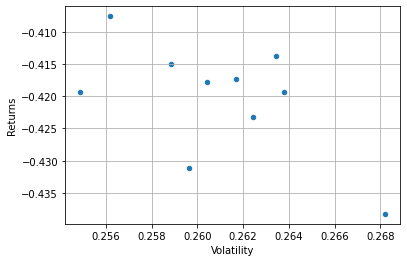

In [18]:
portfolios.plot.scatter(x='Volatility', y='Returns', grid=True)

In [19]:
#minimum variance portfolio
portfolios[portfolios['Volatility']==portfolios['Volatility'].min()]

,Returns,Volatility,AT0000606306 weight,AT0000652011 weight,AT0000720008 weight,AT0000730007 weight,AT0000743059 weight,AT0000746409 weight,AT0000831706 weight,AT0000908504 weight,...,SE0000695876 weight,SE0000825820 weight,SE0001662230 weight,SE0005190238 weight,SE0007100581 weight,SE0007100599 weight,SE0011090018 weight,SE0011166610 weight,SE0012455673 weight,SE0013256682 weight
8,-0.419359,0.254885,0.001333,0.003049,0.003276,0.003827,0.002511,0.001698,0.002776,0.003716,...,0.002023,0.002866,0.00232,0.00052,0.00091,0.002207,0.00305,0.003919,0.002237,0.002802


In [20]:
#minimum variance portfolio
min_var_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
min_var_port

Returns               -0.419359
Volatility             0.254885
AT0000606306 weight    0.001333
AT0000652011 weight    0.003049
AT0000720008 weight    0.003276
                         ...   
SE0007100599 weight    0.002207
SE0011090018 weight    0.003050
SE0011166610 weight    0.003919
SE0012455673 weight    0.002237
SE0013256682 weight    0.002802
Name: 8, Length: 488, dtype: float64

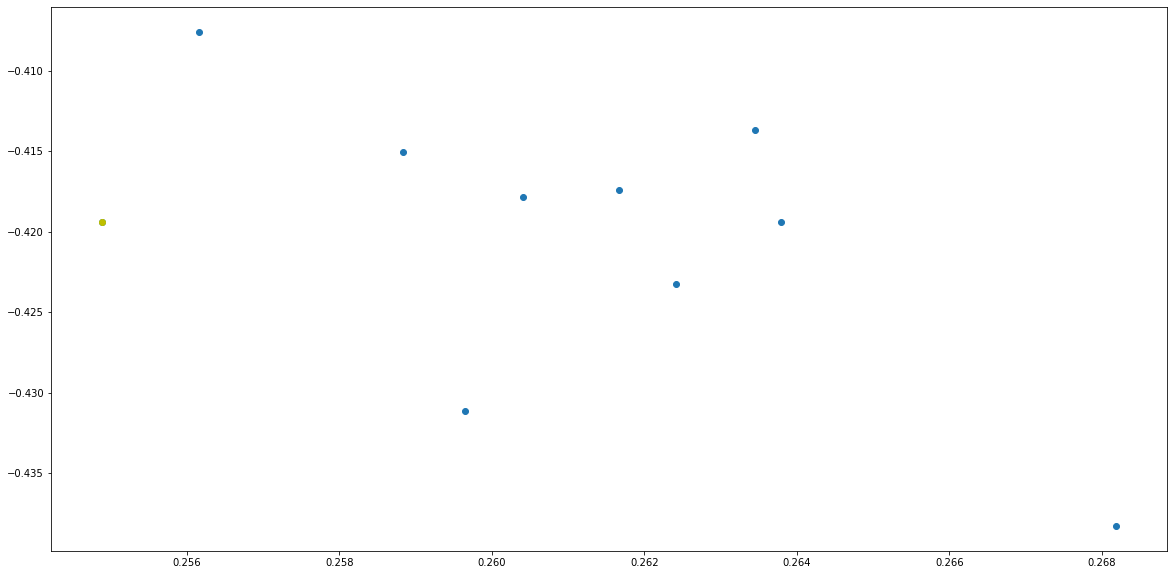

In [21]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'])
plt.scatter(min_var_port[1], min_var_port[0], color='y')

In [22]:
# assumption rf = 0.025
rf = 0.025

Sharpe ratio

In [23]:
sharpe_ratio = ((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()
sharpe_ratio

9

Sortino ratio

In [26]:
def lpm(returns, threshold, order):
    # This method returns a lower partial moment of the returns
    # Create an array he same length as returns containing the minimum return threshold
    threshold_array = np.empty(len(returns))
    threshold_array.fill(threshold)
    # Calculate the difference between the threshold and the returns
    diff = threshold_array - returns_p
    # Set the minimum of each to 0
    diff = diff.clip(min=0)
    # Return the sum of the different to the power of order
    return np.sum(diff ** order) / len(returns)



lpm(p_ret,0, 2)

0.1711378550767097

In [32]:
def sortino_ratio(er, p_ret, rf, target=0):
    return (er - rf) / math.sqrt(lpm(p_ret, target, 2))

sortino_ratio = sortino_ratio(e_r, p_ret, rf, target=0)
print(sortino_ratio.mean())
# # Create a downside return column with the negative returns only
# downside_returns = df.loc[df['pf_returns'] ____ target]

# # Calculate expected return and std dev of downside
# expected_return = df['____'].____()
# down_stdev = downside_returns['pf_returns'].____()

# # Calculate the sortino ratio
# sortino_ratio = (____ - ____)/____

# # Print the results
# print("Expected return  : ", expected_return*100)
# print("Downside risk   : ", down_stdev*100)
# print("Sortino ratio : ", sortino_ratio)



-1.0859125850194862


Other measures

In [ ]:
def treynor_ratio(er, returns, market, rf):
    return (er - rf) / beta(returns, market)
 
 
def sharpe_ratio(er, returns, rf):
    return (er - rf) / vol(returns)
 
 
def information_ratio(returns, benchmark):
    diff = returns - benchmark
    return numpy.mean(diff) / vol(diff)
 
 
def modigliani_ratio(er, returns, benchmark, rf):
    np_rf = numpy.empty(len(returns))
    np_rf.fill(rf)
    rdiff = returns - np_rf
    bdiff = benchmark - np_rf
    return (er - rf) * (vol(rdiff) / vol(bdiff)) + rf